# statistics Descriptive

In [1]:
import numpy as np
import statistics
import math
import scipy.stats
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X = np.random.normal(loc=0,scale=1, size=10)

## Mean

In [4]:
sum(X)/len(X)

-0.13890440325238307

In [5]:
np.mean(X)

-0.13890440325238312

In [6]:
X.mean()

-0.13890440325238312

In [7]:
pd.Series(X).mean()

-0.13890440325238307

In [8]:
X[1] = np.nan

In [9]:
X.mean()

nan

In [10]:
pd.Series(X).mean()

-0.038058033732224224

In [11]:
X

array([ 1.07602537,         nan, -0.7043493 ,  0.38415478, -1.23028578,
       -1.25831732, -0.41998266,  0.5768451 , -0.00992686,  1.24331436])

## Median

In [13]:
X.mean()

0.31948680146666414

In [14]:
np.quantile(X,0.5)

0.30993042612871835

In [15]:
statistics.median(X)

0.30993042612871835

In [16]:
np.median(X)

0.30993042612871835

In [17]:
np.median(X)

0.30993042612871835

## Mode/Modus

In [18]:
X_mode = [1,2,2,3,3,3,4,4,4,4]

In [19]:
statistics.mode(X_mode)

4

In [20]:
mode_scipy = scipy.stats.mode(X_mode)

C:\Users\Immantaka Juniarsa\AppData\Local\Temp\ipykernel_8196\1799685691.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_scipy = scipy.stats.mode(X_mode)


In [21]:
mode_scipy.mode

array([4])

In [22]:
X_mode = [1,2,2,3,3,3,3,4,4,4,4]
pd.Series(X_mode).mode()

0    3
1    4
dtype: int64

## Geometric Mean

In [23]:
X = np.random.randint(1,10,10)

In [24]:
X[-1] = 100

In [25]:
gmean = 1

for Xi in X:
    gmean *= Xi

gmean = gmean**(1/len(X))
print(gmean)

5.510234095918074


In [26]:
X.mean()

14.5

In [27]:
scipy.stats.gmean(X)

5.510234095918073

## Harmonic Mean

In [28]:
hmean = len(X) / sum(1/Xi for Xi in X)
print(hmean)

3.090052972336669


In [29]:
hmean = scipy.stats.hmean(X)
print(hmean)

3.090052972336669


In [30]:
X.sort()
X

array([  1,   1,   4,   4,   6,   6,   7,   8,   8, 100])

In [31]:
print("Mean: ", X.mean())
print("Gmean: ", gmean)
print("Hmean: ", hmean)

Mean:  14.5
Gmean:  5.510234095918074
Hmean:  3.090052972336669


In [33]:
range = X.max() - X.min()

In [34]:
X

array([  1,   1,   4,   4,   6,   6,   7,   8,   8, 100])

In [35]:
np.ptp(X)

99

In [36]:
Q1 = np.quantile(X,0.25)
Q3 = np.quantile(X,.75)

print("IQR: ", Q3-Q1)

IQR:  3.75


In [37]:
np.quantile(X,0.975) - np.quantile(X,0.025)

78.30000000000004

## Variance

In [38]:
X = np.random.random(100)

In [39]:
X.var(ddof=1)

0.07670666858820274

In [40]:
pd.Series(X).var()

0.07670666858820273

In [41]:
X.std(ddof=1)

0.2769596876590576

In [42]:
X.var(ddof=1)**0.5

0.2769596876590576

In [43]:
pd.Series(X).std()

0.2769596876590576

In [44]:
scipy.stats.median_abs_deviation(X)

0.21691212158127815

## Skew

In [45]:
X1 = scipy.stats.skewnorm.rvs(a=10,size=10000,loc=0)

C:\Users\Immantaka Juniarsa\AppData\Local\Temp\ipykernel_8196\3947939701.py:1: RuntimeWarning: invalid value encountered in sqrt
  sns.displot(X1**0.5)


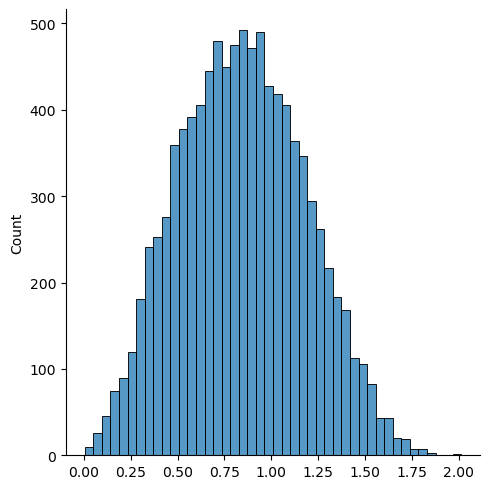

In [46]:
sns.displot(X1**0.5)

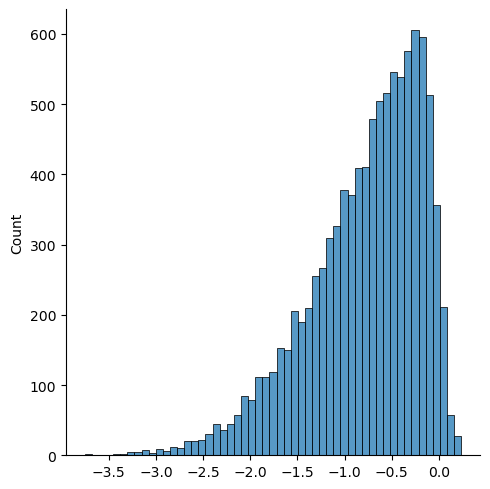

In [47]:
X2 = scipy.stats.skewnorm.rvs(a=-10,size=10000,loc=0)
sns.displot(X2)

In [48]:
scipy.stats.skew(X2)

-0.9568425840833853

In [49]:
scipy.stats.skew(X1)

0.9361477397155723

In [50]:
X1.mean()

0.7978519478945978

In [51]:
X2.mean()

-0.7858007188247671

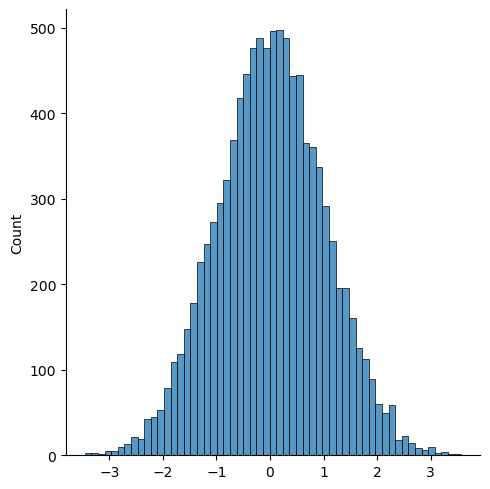

In [52]:
X = scipy.stats.skewnorm.rvs(a=0,size=10000,loc=0)
sns.displot(X)

In [53]:
scipy.stats.kurtosis(X)

-0.05130511365168733

In [54]:
result = scipy.stats.describe(X, ddof=1, bias=False)

In [55]:
result

DescribeResult(nobs=10000, minmax=(-3.4583010369664384, 3.5690941199524238), mean=0.01752945191902421, variance=1.0044931922463367, skewness=0.004910508317138792, kurtosis=-0.05073053536248562)

In [56]:
pd.Series(X).describe()

count    10000.000000
mean         0.017529
std          1.002244
min         -3.458301
25%         -0.651020
50%          0.018173
75%          0.696097
max          3.569094
dtype: float64

## Correlation

In [57]:
X = np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)

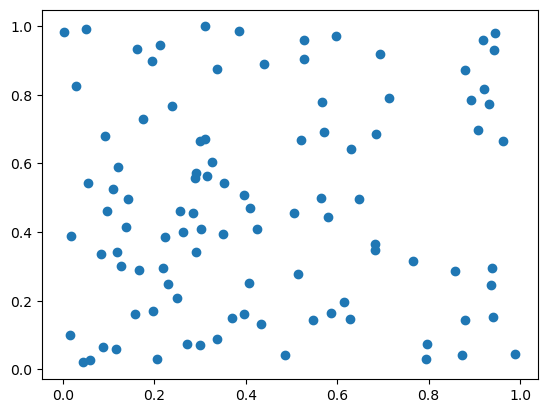

In [58]:
plt.scatter(x=X, y=Y1)

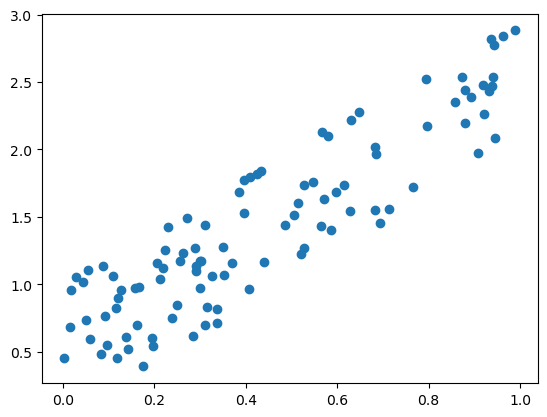

In [59]:
plt.scatter(x=X, y=Y2)

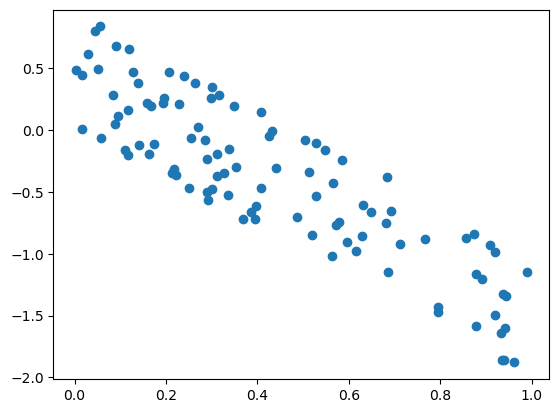

In [60]:
plt.scatter(x=X, y=Y3)

In [61]:
np.cov(X,Y1)

array([[0.08366622, 0.00726115],
       [0.00726115, 0.0917562 ]])

In [62]:
np.cov(X,Y2)

array([[0.08366622, 0.16887794],
       [0.16887794, 0.42079666]])

In [63]:
np.cov(X,Y3)[0,1]

-0.1641499652131374

In [64]:
pd.Series(X).cov(pd.Series(Y3))

-0.1641499652131374

In [65]:
X = 10*np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)

In [66]:
np.cov(X,Y3)

array([[  8.091392  , -16.27240258],
       [-16.27240258,  32.8026049 ]])

In [67]:
X = np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)

In [68]:
cov_xy = np.cov(X,Y2)[0,1]

In [70]:
cov_xy / (X.std()* Y2.std())

0.923683763569063

In [71]:
X = 10*np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)

In [72]:
cov_xy = np.cov(X,Y2)[0,1]

In [73]:
cov_xy /(X.std(ddof=1)*Y2.std(ddof=1))

0.9986551227053766

In [74]:
np.corrcoef(X,Y3)

array([[ 1.        , -0.99879823],
       [-0.99879823,  1.        ]])

In [75]:
np.corrcoef(X,Y2)[0,1]

0.9986551227053766

In [76]:
scipy.stats.linregress(X,Y2).rvalue

0.9986551227053766

## 2D

In [77]:
df = pd.DataFrame(
    {"A": X,
    "B": Y1,
    "C" : Y2
    }
)

In [78]:
df.head()

,A,B,C
0,2.600636,0.115657,5.780012
1,1.371697,0.495528,3.451241
2,8.450873,0.234609,17.433583
3,2.559491,0.698808,5.781245
4,3.052703,0.237309,6.767877


In [79]:
df.describe()

,A,B,C
count,100.000000,100.000000,100.000000
mean,5.127606,0.462762,10.761744
std,2.866368,0.296447,5.727653
min,0.157142,0.003131,0.642421
25%,2.550922,0.215854,5.746241
50%,5.638878,0.439469,11.746605
75%,7.341840,0.709794,15.222862
max,9.959302,0.992749,20.714385


In [80]:
np.mean(df, axis=0)

A     5.127606
B     0.462762
C    10.761744
dtype: float64

In [81]:
df.median()

A     5.638878
B     0.439469
C    11.746605
dtype: float64

In [82]:
scipy.stats.gmean(df, axis=0)

array([3.79420176, 0.31538312, 8.45681392])

In [83]:
scipy.stats.hmean(df, axis=0)

array([1.87942114, 0.08669245, 5.39658095])

In [84]:
scipy.stats.describe(df)

DescribeResult(nobs=100, minmax=(array([0.15714164, 0.00313075, 0.64242062]), array([ 9.9593018 ,  0.99274932, 20.71438462])), mean=array([ 5.12760609,  0.46276188, 10.76174446]), variance=array([ 8.21606309,  0.08788082, 32.80600328]), skewness=array([-0.21836286,  0.18356166, -0.21553594]), kurtosis=array([-1.17625824, -1.17936478, -1.14479525]))

In [85]:
df.corr()

,A,B,C
A,1.000000,-0.062431,0.998655
B,-0.062431,1.000000,-0.059424
C,0.998655,-0.059424,1.000000


<AxesSubplot:>

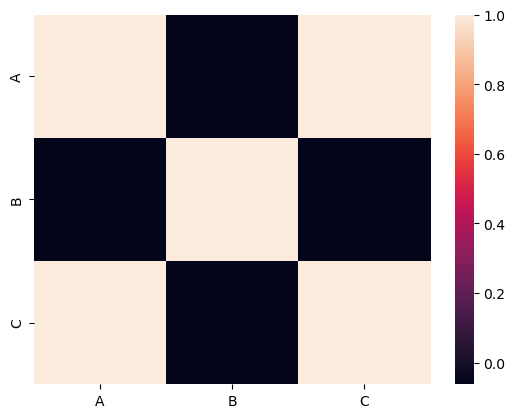

In [86]:
sns.heatmap(df.corr())